<a href="https://colab.research.google.com/github/undisputedcoder/Fast-Food-Convolutional-Neural-Network/blob/main/food_classsification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convulational Neural Network**
A neural network using Tensorflow will be created to identify certain images of food and check if it can classify the food correctly. 

Note: To train the network faster make sure to change the runtime type to GPU.

All the required libraries are imported.

In [ ]:
import os
import PIL
import PIL.Image
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Open the dataset located and create an array of the classes that will be used for classification. 

In [ ]:
import pathlib

data_dir = pathlib.Path("/content/drive/MyDrive/food")

CLASSES = ["pizza", "hot dog", "taco"]

The main parameters are defined.

In [ ]:
img_size = 180
batch = 32

The dataset is split into training and validation datasets using an 80-20 split meaning 80% of the images will be used for training and the remaining 20% for validation.

In [ ]:
import tensorflow as tf

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_size, img_size),
  batch_size=batch)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_size, img_size),
  batch_size=batch)

class_names = train_ds.class_names

Found 1129 files belonging to 3 classes.
Using 904 files for training.
Found 1129 files belonging to 3 classes.
Using 225 files for validation.


# **Create the Model**

All the images in the dataset are converted to the same size depending on the value of img_size. Data augmentation is applied to increase the total number of images used for training and improve the ability to generalise better. 

In [ ]:
import keras

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(img_size, img_size, 3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

The actual model is created consisting of three hidden layers using a 3x3 filter and 2x2 max pooling filter. A dropout layer and flatten layer are included as well. The output layer is a dense layer with three neurons which corresponds to the number of classes for classification. 

In [ ]:
num_classes = 3

model = tf.keras.Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, (3,3), activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(32, (3,3), activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, (3,3) , activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

The model is compiled.

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

# **Train the model**
The model is trained with the defined number of epochs. The higher the epochs the better the accuracy of the model will be but be sure to avoid overfitting. 

In [ ]:
EPOCHS = 13

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=EPOCHS
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# **Plot the accuracy and loss**
The accuracy and loss of the training and validation dataset is plotted to easily visualise the performance of the network and make decisions for which parameters or hyperparameters to tune for the optimum results.

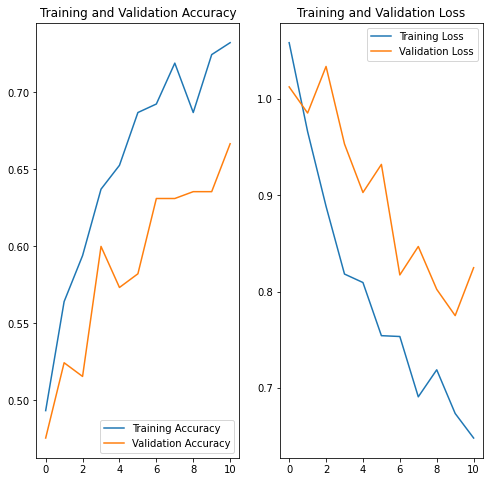

In [ ]:
epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Prediction**
The model is used to make a prediction with an image not seen by the network to check the accuracy of the network in classifying the image to the appropriate label or class. 

In [ ]:
import numpy as np

hotdog_path = pathlib.Path("/content/drive/MyDrive/test0.jpg")

img = keras.preprocessing.image.load_img(
    hotdog_path, target_size=(img_size, img_size)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to hot dog with a 50.97 percent confidence.
